In [76]:
import numpy as np 
import pandas as pd 
import os
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

Limpieza de datos

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import eli5
from eli5.sklearn import PermutationImportance
from collections import Counter
import missingno as msno

import warnings
warnings.filterwarnings('ignore')

In [4]:
df=pd.read_csv('data.csv')

In [5]:
df.head()

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


In [6]:
df.drop(['Unnamed: 0','Photo','Flag','Club Logo'],axis=1,inplace=True) #Se eliminan los campos que no se usaran

In [7]:
df.dtypes

ID                            int64
Name                         object
Age                           int64
Nationality                  object
Overall                       int64
Potential                     int64
Club                         object
Value                        object
Wage                         object
Special                       int64
Preferred Foot               object
International Reputation    float64
Weak Foot                   float64
Skill Moves                 float64
Work Rate                    object
Body Type                    object
Real Face                    object
Position                     object
Jersey Number               float64
Joined                       object
Loaned From                  object
Contract Valid Until         object
Height                       object
Weight                       object
LS                           object
ST                           object
RS                           object
LW                          

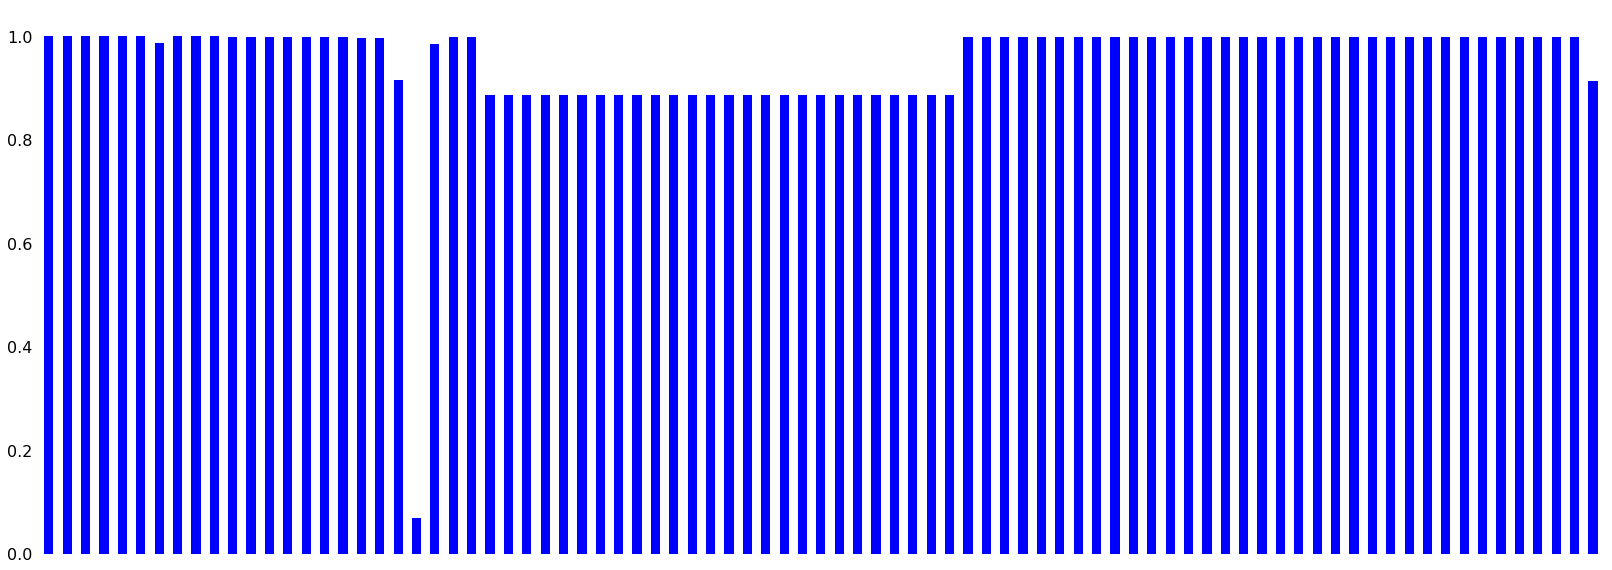

In [8]:
#Se analiza la cantidad de datos por cada variable

msno.bar(df.sample( 18207 ),(28,10),color='blue')
#Se determina que hay muy pocos datos en la variable loaned from. Por lo tanto se elimina

In [10]:
df.drop(['Loaned From'],axis=1,inplace=True)

In [11]:
df.head()

,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Special,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,158023,L. Messi,31,Argentina,94,94,FC Barcelona,€110.5M,€565K,2202,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,20801,Cristiano Ronaldo,33,Portugal,94,94,Juventus,€77M,€405K,2228,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,190871,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,€118.5M,€290K,2143,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,193080,De Gea,27,Spain,91,93,Manchester United,€72M,€260K,1471,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,192985,K. De Bruyne,27,Belgium,91,92,Manchester City,€102M,€355K,2281,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


Análisis

In [12]:
#Se contabilizan el numero de nacionalidades disponibles con la cantidad de jugadores
print('Numero de nacionalidades : {0}'.format(df['Nationality'].nunique()))
print(df['Nationality'].value_counts().head(5))



Numero de nacionalidades : 164
England      1662
Germany      1198
Spain        1072
Argentina     937
France        914
Name: Nationality, dtype: int64


In [13]:
#Se contabiliza el numero de clubes y jugadores
print('Numero de clubes total : {0}'.format(df['Club'].nunique()))
print(df['Club'].value_counts().head(5))

Numero de clubes total : 651
FC Barcelona         33
Burnley              33
RC Celta             33
Real Madrid          33
Borussia Dortmund    33
Name: Club, dtype: int64


Se analizaran las habilidades mas importantes y los jugadores con mejor desempeño en estas

In [14]:
pr_cols=['Crossing', 'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys',
       'Dribbling', 'Curve', 'FKAccuracy', 'LongPassing', 'BallControl',
       'Acceleration', 'SprintSpeed', 'Agility', 'Reactions', 'Balance',
       'ShotPower', 'Jumping', 'Stamina', 'Strength', 'LongShots',
       'Aggression', 'Interceptions', 'Positioning', 'Vision', 'Penalties',
       'Composure', 'Marking', 'StandingTackle', 'SlidingTackle', 'GKDiving',
       'GKHandling', 'GKKicking', 'GKPositioning', 'GKReflexes']
i=0
while i < len(pr_cols):
    print('Mejor {0} : {1}'.format(pr_cols[i],df.loc[df[pr_cols[i]].idxmax()][1]))
    i += 1

Mejor Crossing : K. De Bruyne
Mejor Finishing : L. Messi
Mejor HeadingAccuracy : Naldo
Mejor ShortPassing : L. Modrić
Mejor Volleys : E. Cavani
Mejor Dribbling : L. Messi
Mejor Curve : Quaresma
Mejor FKAccuracy : L. Messi
Mejor LongPassing : T. Kroos
Mejor BallControl : L. Messi
Mejor Acceleration : Douglas Costa
Mejor SprintSpeed : K. Mbappé
Mejor Agility : Neymar Jr
Mejor Reactions : Cristiano Ronaldo
Mejor Balance : Bernard
Mejor ShotPower : Cristiano Ronaldo
Mejor Jumping : Cristiano Ronaldo
Mejor Stamina : N. Kanté
Mejor Strength : A. Akinfenwa
Mejor LongShots : L. Messi
Mejor Aggression : B. Pearson
Mejor Interceptions : N. Kanté
Mejor Positioning : Cristiano Ronaldo
Mejor Vision : L. Messi
Mejor Penalties : M. Balotelli
Mejor Composure : L. Messi
Mejor Marking : A. Barzagli
Mejor StandingTackle : G. Chiellini
Mejor SlidingTackle : Sergio Ramos
Mejor GKDiving : De Gea
Mejor GKHandling : J. Oblak
Mejor GKKicking : M. Neuer
Mejor GKPositioning : G. Buffon
Mejor GKReflexes : De Gea


In [15]:
#Cleaning some of values so that we can interpret them 
def valor_numero(df_value):
    try:
        valor = float(df_value[1:-1])
        sufijo = df_value[-1:]

        if sufijo == 'M':
            valor = valor * 1000000
        elif sufijo == 'K':
            valor = valor * 1000
    except ValueError:
        valor = 0
    return valor

df['Value'] = df['Value'].apply(valor_numero)
df['Wage'] = df['Wage'].apply(valor_numero)

In [16]:
df.head()

,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Special,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,158023,L. Messi,31,Argentina,94,94,FC Barcelona,110500000.0,565000.0,2202,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,20801,Cristiano Ronaldo,33,Portugal,94,94,Juventus,77000000.0,405000.0,2228,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,190871,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,118500000.0,290000.0,2143,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,193080,De Gea,27,Spain,91,93,Manchester United,72000000.0,260000.0,1471,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,192985,K. De Bruyne,27,Belgium,91,92,Manchester City,102000000.0,355000.0,2281,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


Se tiene como hipotesis que a medida que la edad del jugador sube su potencial disminuye

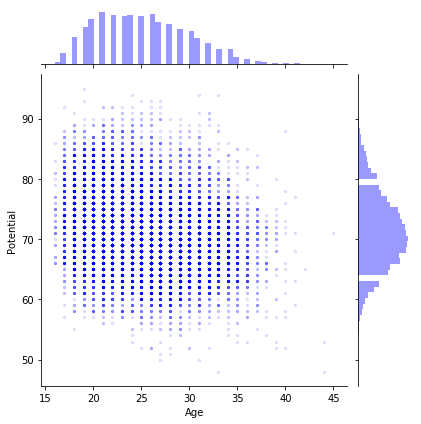

In [19]:
sns.jointplot(x=df['Age'],y=df['Potential'],
              joint_kws={'alpha':0.1,'s':5,'color':'blue'},
              marginal_kws={'color':'blue'})

#Se analiza la correlacion entre la edad y el potencial.

In [20]:
player_features = (
    'Acceleration', 'Aggression', 'Agility', 
    'Balance', 'BallControl', 'Composure', 
    'Crossing', 'Dribbling', 'FKAccuracy', 
    'Finishing', 'GKDiving', 'GKHandling', 
    'GKKicking', 'GKPositioning', 'GKReflexes', 
    'HeadingAccuracy', 'Interceptions', 'Jumping', 
    'LongPassing', 'LongShots', 'Marking', 'Penalties'
)



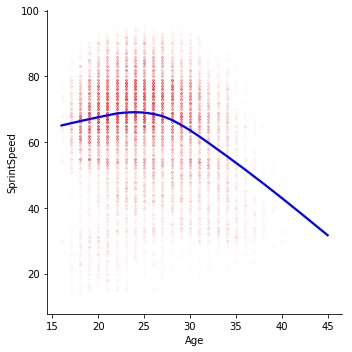

In [21]:
sns.lmplot(data = df, x = 'Age', y = 'SprintSpeed',lowess=True,scatter_kws={'alpha':0.01, 's':5,'color':'red'}, 
           line_kws={'color':'blue'})
#Correlacion entre edad y velocidad

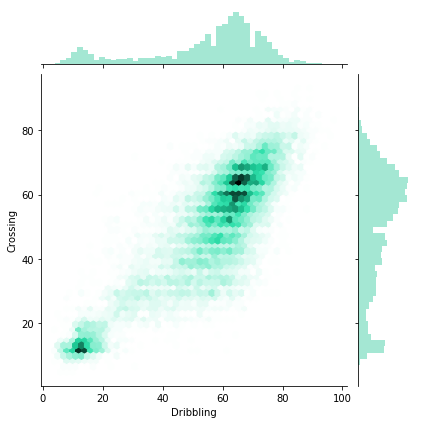

In [23]:
# correlacion entre capacidad de desborde y dribleo
sns.jointplot(x=df['Dribbling'], y=df['Crossing'], kind="hex", color="#1CC391");

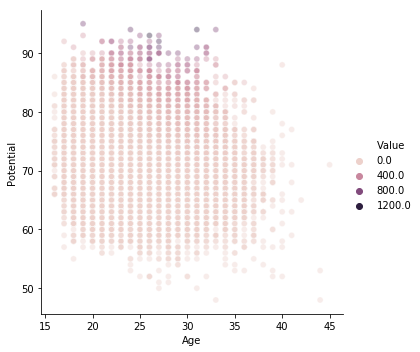

In [27]:
# se analiza la relación entre edad, potencial y valor
value = df.Value
cmap = sns.cubehelix_palette(rot=-.3, as_cmap=True)

sns.relplot(x="Age", y="Potential", hue=value/100000, 
            sizes=(30, 300), alpha=.4,
            height=5, data=df);

Se observa que si el jugador tiene alto potencial, es joven tendría un mas alto valor

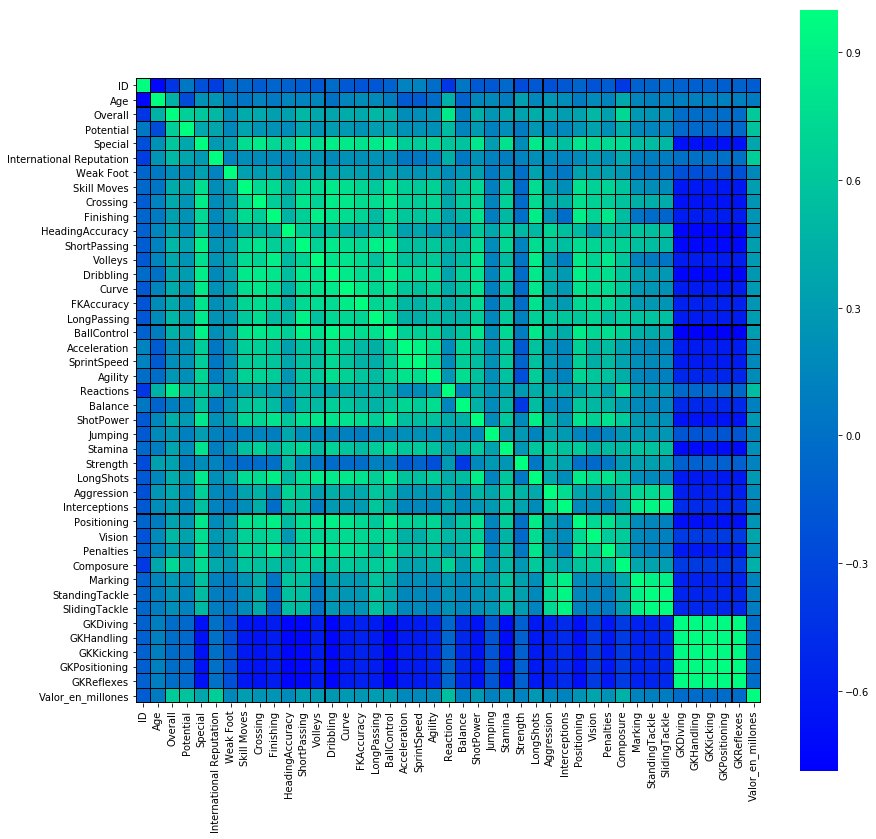

In [94]:
plt.figure(figsize=(14,14))
sns.heatmap(df.corr(),linewidths=0.1,linecolor='black',square=True,cmap='winter')

#Se analiza la correlacion entre cada una de las variables, se observa alta correlacion en habilidades de los arqueros, como los son los reflejos, la velocidad

A continuación, se busca lograr obtener un modelo que predizca el overall, o player rating de un jugador para ver cuales son las variables que
mas peso tienen a la hora de definir si un jugador es bueno o no

In [55]:
df=pd.read_csv('data.csv')
#Se eliminan las variables que no seran usadas
drop_cols = df.columns[28:54]
df = df.drop(drop_cols, axis = 1)
df = df.drop(['Unnamed: 0','ID','Photo','Flag','Club Logo','Jersey Number','Joined','Special','Loaned From','Body Type', 'Release Clause',
               'Weight','Height','Contract Valid Until','Wage','Value','Name','Club'], axis = 1)
df = df.dropna()
df.head()

,Age,Nationality,Overall,Potential,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Real Face,...,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes
0,31,Argentina,94,94,Left,5.0,4.0,4.0,Medium/ Medium,Yes,...,75.0,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0
1,33,Portugal,94,94,Right,5.0,4.0,5.0,High/ Low,Yes,...,85.0,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0
2,26,Brazil,92,93,Right,5.0,5.0,5.0,High/ Medium,Yes,...,81.0,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0
3,27,Spain,91,93,Right,4.0,3.0,1.0,Medium/ Medium,Yes,...,40.0,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0
4,27,Belgium,91,92,Right,4.0,5.0,4.0,High/ High,Yes,...,79.0,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0


In [56]:
#Se convierten algunas variables categoricas en númericas para usar un modelo de regresion lineal
def face_numero(df):
    if (df['Real Face'] == 'Yes'):
        return 1
    else:
        return 0
    

def pierna_derecha(df):
    if (df['Preferred Foot'] == 'Right'):
        return 1
    else:
        return 0

#Algunas posiciones que son muy parecidas se agrupan para hacer el analisis mas sencillo, defensas, mediocampista defensivo, mediocampista
#ofensivos, extremos y delanterios
def posicion(df):
    if (df['Position'] == 'GK'):
        return 'GK'
    elif ((df['Position'] == 'RB') | (df['Position'] == 'LB') | (df['Position'] == 'CB') | (df['Position'] == 'LCB') | (df['Position'] == 'RCB') | (df['Position'] == 'RWB') | (df['Position'] == 'LWB') ):
        return 'DF'
    elif ((df['Position'] == 'LDM') | (df['Position'] == 'CDM') | (df['Position'] == 'RDM')):
        return 'DM'
    elif ((df['Position'] == 'LM') | (df['Position'] == 'LCM') | (df['Position'] == 'CM') | (df['Position'] == 'RCM') | (df['Position'] == 'RM')):
        return 'MF'
    elif ((df['Position'] == 'LAM') | (df['Position'] == 'CAM') | (df['Position'] == 'RAM') | (df['Position'] == 'LW') | (df['Position'] == 'RW')):
        return 'AM'
    elif ((df['Position'] == 'RS') | (df['Position'] == 'ST') | (df['Position'] == 'LS') | (df['Position'] == 'CF') | (df['Position'] == 'LF') | (df['Position'] == 'RF')):
        return 'ST'
    else:
        return df.Position

#Se escogeran solamente los paises con mayor cantidad de jugadores profesionales para el analisis
nat_counts = df.Nationality.value_counts()
nat_list = nat_counts[nat_counts > 280].index.tolist()

#Todos aquellos en estos paises, se les coloca un indicador
def major_nation(df):
    if (df.Nationality in nat_list):
        return 1
    else:
        return 0


df1 = df.copy()

#Apply changes to dataset to create new column
df1['Real_Face'] = df1.apply(face_numero, axis=1)
df1['Right_Foot'] = df1.apply(pierna_derecha, axis=1)
df1['Simple_Position'] = df1.apply(posicion,axis = 1)
df1['Major_Nation'] = df1.apply(major_nation,axis = 1)


tempwork = df1["Work Rate"].str.split("/ ", n = 1, expand = True) 

df1["WorkRate1"]= tempwork[0]   

df1["WorkRate2"]= tempwork[1]

df1 = df1.drop(['Work Rate','Preferred Foot','Real Face', 'Position','Nationality'], axis = 1)
df1.head()


,Age,Overall,Potential,International Reputation,Weak Foot,Skill Moves,Crossing,Finishing,HeadingAccuracy,ShortPassing,...,GKHandling,GKKicking,GKPositioning,GKReflexes,Real_Face,Right_Foot,Simple_Position,Major_Nation,WorkRate1,WorkRate2
0,31,94,94,5.0,4.0,4.0,84.0,95.0,70.0,90.0,...,11.0,15.0,14.0,8.0,1,0,ST,1,Medium,Medium
1,33,94,94,5.0,4.0,5.0,84.0,94.0,89.0,81.0,...,11.0,15.0,14.0,11.0,1,1,ST,1,High,Low
2,26,92,93,5.0,5.0,5.0,79.0,87.0,62.0,84.0,...,9.0,15.0,15.0,11.0,1,1,AM,1,High,Medium
3,27,91,93,4.0,3.0,1.0,17.0,13.0,21.0,50.0,...,85.0,87.0,88.0,94.0,1,1,GK,1,Medium,Medium
4,27,91,92,4.0,5.0,4.0,93.0,82.0,55.0,92.0,...,13.0,5.0,10.0,13.0,1,1,MF,0,High,High


In [57]:
#la variable objetivo es el overall. Lo cual es la representacion general de la habilidad de un jugador
target = df1.Overall
df2 = df1.drop(['Overall'], axis = 1)


from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df2, target, test_size=0.2)


X_train = pd.get_dummies(X_train)
X_test = pd.get_dummies(X_test)
print(X_test.shape,X_train.shape)
print(y_test.shape,y_train.shape)

(3630, 54) (14517, 54)
(3630,) (14517,)


In [62]:

from sklearn.linear_model import LinearRegression
from sklearn import metrics
model = LinearRegression()
model.fit(X_train, y_train)
predictions = model.predict(X_test)




RMSE : 1.8199873389546355


In [48]:
perm = PermutationImportance(model, random_state=1).fit(X_test, y_test)
eli5.show_weights(perm, feature_names = X_test.columns.tolist())
#mediante esta funcion es posible analizar cuales son las variables con mas peso

Weight,Feature
0.3492 ± 0.0092,Potential
0.1942 ± 0.0102,Age
0.0810 ± 0.0020,Reactions
0.0627 ± 0.0040,BallControl
0.0465 ± 0.0038,GKReflexes
0.0318 ± 0.0012,GKDiving
0.0269 ± 0.0022,HeadingAccuracy
0.0256 ± 0.0016,ShortPassing
0.0217 ± 0.0010,GKHandling
0.0143 ± 0.0015,Skill Moves


Se determinan que las habilidades que mas peso tienen para que un jugador sea considerado como bueno, son la edad, capacidad de reacción
potencial y control de balon. Mientras que en los porteros, son los reflejos y la capacidad de lanzarse.

In [50]:
regressor = LinearRegression()  
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [51]:
y_pred = regressor.predict(X_test)

In [60]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df1 = df.head(25)
df1

,Actual,Predicted
12744,63,64.440146
3848,72,68.213275
7852,67,71.217544
12281,63,80.793900
6646,68,67.537852
15623,59,65.368585
9726,66,62.984283
1815,75,68.624433
2475,74,75.964394
13162,62,72.513985


In [63]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 7.57923461238052
Mean Squared Error: 90.29705726114356
Root Mean Squared Error: 9.502476375195235


A continuación nos centraremos en las variables precio y overall con el fin de determinar, dado un presupuesto limitado, cuales son los
mejores jugadores que se pueden comprar dado un equipo con una formacion 4.4.2

In [64]:
df = pd.read_csv('data.csv')

In [65]:
drop_cols = ['Unnamed: 0', 'LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW', 'LAM', 'CAM', 'RAM', 'LM', 'LCM', 'CM', 'RCM', 'RM', 'LWB', 'LDM',
       'CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB', 'Body Type', 'Jersey Number', 'Joined', 'Loaned From', 'Flag', 'Club Logo',
             'Contract Valid Until', 'Photo']
df.drop(drop_cols, axis=1, inplace=True)

In [66]:
all_pos = {'RF': 'Forward', 'ST': 'Forward', 'LW': 'Forward', 'GK': 'Goalkeeper', 'RCM': 'Midfielder', 
           'LF': 'Forward', 'RS': 'Forward', 'RCB': 'Defender', 'LCM': 'Midfielder', 'CB': 'Defender',
           'LDM': 'Midfielder', 'CAM':  'Midfielder', 'CDM': 'Midfielder', 'LS': 'Forward', 'LCB': 'Defender', 
           'RM': 'Midfielder', 'LAM': 'Midfielder', 'LM': 'Midfielder', 'LB': 'Defender', 'RDM': 'Midfielder',
           'RW': 'Forward', 'CM': 'Midfielder', 'RB': 'Defender', 'RAM': 'Midfielder', 'CF': 'Forward', 'RWB': 'Defender', 'LWB': 'Defender'}

df['Position_Cat'] = df['Position'].map(all_pos)#Se clasifican las posiciones

In [68]:
df['Valor_en_millones'] = df['Value'].apply(lambda x: float(x[1:-1])/1000 if (x[-1] == 'K' and x[1] != '0') else (0.001 if x [-1] == '0' else float(x[1:-1])))
#Se obtiene un valor en millones de los precios

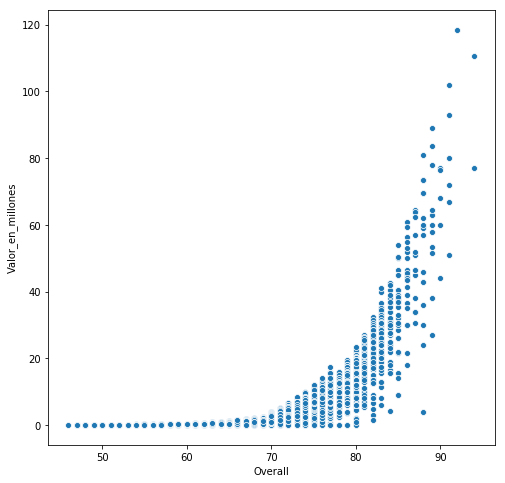

In [69]:
fig, ax = plt.subplots(figsize=(8, 8))
sns.scatterplot(x="Overall", y="Valor_en_millones", data=df, ax=ax);

Se observa en la grafica superior, que existe una relacion directa entre overall y el precio del jugador, sin embargo es una relación no
lineal. A medida que el jugador es mejor, su precio sube muy significativamente.

In [70]:
pos_4_4_2_dict = {'GK': ['GK'], 'LCB': ['CB', 'LCB'], 'RCB': ['CB', 'RCB'], 'LB': ['LB', 'LWB'], 'RB': ['RB', 'RWB'], 
'CM': ['CM', 'CDM'], 'LCM': ['LCM', 'CAM'], 'RCM': ['RCM', 'CAM'], 'RW': ['RAM', 'RF'], 'CF': ['CF'], 
'ST': ['ST', 'RS', 'LS']} #Se escogen las posiciones de los jugadores que requiere el equipo de futbol

In [74]:
pos_value_df = df.groupby(['Position'])['Valor_en_millones'].sum().reset_index()
pos_4_4_2_df = pos_value_df[pos_value_df['Position'].isin(pos_4_4_2_dict.keys())]
pos_4_4_2_counts = df[df['Position'].isin(pos_4_4_2_dict.keys())]['Position'].value_counts()
pos_4_4_2_df['Counts'] = pos_4_4_2_df['Position'].apply(lambda x: pos_4_4_2_counts[x])
pos_4_4_2_df['Valor_en_millones'] = pos_4_4_2_df['Valor_en_millones']/pos_4_4_2_df['Counts']
pos_4_4_2_sum = pos_4_4_2_df['Valor_en_millones'].sum()
pos_4_4_2_df['Ratio'] = pos_4_4_2_df['Valor_en_millones'].apply(lambda x: round(x/pos_4_4_2_sum, 2))
pos_4_4_2_df = pos_4_4_2_df.set_index('Position')
pos_4_4_2_df.drop(['Counts'], axis=1) #El ratio es calculado para conocer la proporcion en que se va a invertir en cada posicion

,Valor_en_millones,Ratio
Position,,
CF,3.271622,0.11
CM,1.966468,0.06
GK,1.585833,0.05
LB,1.718300,0.06
LCB,3.010414,0.10
LCM,4.265003,0.14
RB,1.688058,0.06
RCB,3.046073,0.10
RCM,4.123488,0.13


In [80]:
def f(x):
    presupuesto = x
    sub_df = pd.DataFrame()
    player_running_l = []
    for pos in pos_4_4_2_dict.keys():
        sub_df = df[(df['Position'].isin(pos_4_4_2_dict[pos])) & ~(df['Name'].isin(player_running_l)) & \
                  (df['Valor_en_millones'] <= pos_4_4_2_df.loc[pos, 'Ratio'] * presupuesto)]
        
        overall = sub_df['Overall'].max()
        name = sub_df.loc[sub_df[(sub_df['Overall'] == overall)]['Valor_en_millones'].argmin()]['Name']
        
        pos_4_4_2_df.loc[pos, 'Player'] = name
        pos_4_4_2_df.loc[pos, 'Overall'] = overall
        player_running_l.append(name)

    display(pos_4_4_2_df.reindex(pos_4_4_2_dict.keys())[['Player', 'Overall']])

#Esta funcion es usada para maximizar el overall de acuerdo a un limite de presupuesto

In [86]:
f(10) #Equipo con presupuesto de 10 Millones de euros

,Player,Overall
Position,,
GK,A. Lunev,79.0
LCB,A. Granqvist,80.0
RCB,Hilton,78.0
LB,B. Jokič,75.0
RB,I. Smolnikov,79.0
CM,L. Paredes,80.0
LCM,C. Riveros,76.0
RCM,K. Traoré,75.0
RW,A. Ienaga,69.0


In [87]:
f(20)#Equipo con presupuesto de 20 Millones de euros

,Player,Overall
Position,,
GK,S. Sorrentino,80.0
LCB,A. Granqvist,80.0
RCB,Hilton,78.0
LB,B. Jokič,75.0
RB,I. Smolnikov,79.0
CM,L. Paredes,80.0
LCM,C. Riveros,76.0
RCM,K. Traoré,75.0
RW,Clayton Fildeiras,72.0


In [88]:
f(80)#Equipo con presupuesto de 80 Millones de euros

,Player,Overall
Position,,
GK,G. Buffon,88.0
LCB,A. Barzagli,84.0
RCB,Juiano Mestres,82.0
LB,J. Holebas,78.0
RB,Dani Alves,82.0
CM,L. Paredes,80.0
LCM,Borja Valero,81.0
RCM,J. Farfán,79.0
RW,L. Podolski,78.0


In [89]:
f(300)#Equipo con presupuesto de 300 Millones de euros

,Player,Overall
Position,,
GK,G. Buffon,88.0
LCB,G. Chiellini,89.0
RCB,Thiago Silva,88.0
LB,A. Kolarov,82.0
RB,Dani Alves,82.0
CM,Fernandinho,86.0
LCM,A. Vidal,85.0
RCM,S. Khedira,85.0
RW,J. Cuadrado,84.0


In [90]:
f(500)#Equipo con presupuesto de 500 Millones de euros

,Player,Overall
Position,,
GK,G. Buffon,88.0
LCB,D. Godín,90.0
RCB,Thiago Silva,88.0
LB,Filipe Luís,85.0
RB,K. Walker,84.0
CM,Fernandinho,86.0
LCM,David Silva,90.0
RCM,I. Rakitić,87.0
RW,D. Mertens,87.0


In [93]:
f(800)#Equipo con presupuesto de 800 Millones de euros

,Player,Overall
Position,,
GK,M. Neuer,89.0
LCB,D. Godín,90.0
RCB,Sergio Ramos,91.0
LB,Marcelo,88.0
RB,Azpilicueta,86.0
CM,Fernandinho,86.0
LCM,David Silva,90.0
RCM,L. Modrić,91.0
RW,D. Mertens,87.0


In [92]:
f(100000)#Equipo con presupuesto de 100.000 Millones de euros

,Player,Overall
Position,,
GK,De Gea,91.0
LCB,D. Godín,90.0
RCB,Sergio Ramos,91.0
LB,Marcelo,88.0
RB,Azpilicueta,86.0
CM,Sergio Busquets,89.0
LCM,David Silva,90.0
RCM,L. Modrić,91.0
RW,L. Messi,94.0
